# Posttest 5 Kecerdasan Buatan
## Nama : Rismayanti  
## NIM  : 2109106025

# Mengimport Library yang Dibutuhkan

In [4]:
import pandas as pd
import seaborn as sns
import warnings

In [5]:
warnings.filterwarnings('ignore')

# Unsupervised Learning menggunakan Algoritma K-Means

### Membaca Dataset

In [6]:
dataset = pd.read_csv("StudentsPerformance.csv")

### Menampilkan 10 dataset pertama

In [7]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Mengecek Data Null pada Dataset
##### Jika terdapat data Null maka akan dicleaning data dengan menghilangkan nilai nullnya
##### Tetapi pada dataset saya tidak terdapat data null

In [8]:
dataset.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Mengecek Data Duplikat pada Dataset
##### Jika terdapat data duplicate maka akan dicleaning data dengan menghilangkan nilai duplicatenya
##### Tetapi pada dataset saya tidak terdapat data duplicate

In [9]:
dataset[dataset.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


### Mengecek Jumlah Data Duplikat pada Dataset

In [10]:
dataset.duplicated().sum()

0

### Subset & Data Scalling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Memilih atribut yang digunakan untuk unsupervised learning
df_subset = dataset[['reading score', 'writing score']]

In [13]:
ss = StandardScaler()

In [14]:
x_scaled = ss.fit_transform(df_subset)

In [15]:
print(x_scaled)

[[ 0.19399858  0.39149181]
 [ 1.42747598  1.31326868]
 [ 1.77010859  1.64247471]
 ...
 [ 0.12547206 -0.20107904]
 [ 0.60515772  0.58901542]
 [ 1.15336989  1.18158627]]


### K-Means Clustering

In [16]:
# Import KMeans untuk clustering
from sklearn.cluster import KMeans

In [17]:
# Membuat objek K-Means dengan clusternya yaitu 3
model_kmeans = KMeans(n_clusters = 3)

In [18]:
# Melakukan fit terhadap model
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [19]:
# Menentukan label untuk cluster
labels = model_kmeans.labels_

In [20]:
print(labels)

[1 2 2 0 1 2 2 0 1 0 0 0 1 1 0 1 2 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 2 2 2
 1 2 0 0 1 1 1 0 0 1 1 1 2 0 1 0 1 2 0 2 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 0 2 1 1 0 0 0 1 0 2 2 1 1 2 1 0 1 0 2 2 1 1 1 1 1 1 2 0 2 1 2 1 1 1 2
 0 0 0 2 1 2 2 1 1 2 2 2 0 1 2 1 1 2 0 2 0 1 2 1 0 0 0 1 1 1 1 0 0 1 0 2 1
 2 2 1 1 1 0 1 2 1 1 2 1 1 2 0 0 2 2 0 1 2 1 1 2 2 1 0 2 0 1 1 2 1 1 0 1 0
 1 1 1 0 2 1 2 1 1 2 0 1 0 0 2 2 2 1 1 0 1 1 2 2 1 2 0 1 0 2 2 2 0 1 0 1 2
 1 2 1 0 1 0 1 2 1 0 2 2 2 1 1 1 0 2 1 2 0 0 1 1 1 1 1 0 0 2 1 1 0 1 1 1 1
 2 2 2 0 2 1 0 2 1 2 1 1 0 0 1 2 1 2 1 2 0 0 0 2 2 0 2 2 2 1 1 1 1 0 1 2 1
 0 1 0 2 2 0 2 1 2 1 2 0 1 0 2 0 1 1 1 1 2 1 1 1 2 2 2 0 0 2 1 0 1 0 1 0 0
 2 2 1 1 0 0 0 0 1 1 1 1 2 0 2 1 1 1 0 2 0 1 1 1 1 1 2 1 2 0 0 0 0 0 1 1 2
 1 1 1 2 1 0 2 2 2 1 2 2 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 2 1 0 1 0 1 2 1 1 1
 2 0 2 1 2 1 1 1 1 1 1 1 0 2 1 1 2 0 1 2 1 0 0 1 1 0 0 1 0 1 1 0 2 2 2 1 2
 2 1 1 2 0 1 2 2 1 0 1 0 2 0 2 1 0 0 1 2 1 2 0 1 2 1 2 1 2 1 2 2 1 1 1 1 1
 0 1 0 0 1 0 1 0 2 2 1 2 

### Evaluasi Hasil Pemodelan : Buat Cross_Tab untuk membandingkan antar cluster

In [21]:
# membuat dataFrame dengan label dan gender sebagai kolom
df_kmeans = pd.DataFrame(
    {'labels' : labels, 
     'gender' : dataset.gender})

In [22]:
# membuat cross tab
ct = pd.crosstab(df_kmeans['labels'], df_kmeans['gender'])

In [23]:
print(ct)

gender  female  male
labels              
0           87   176
1          230   219
2          201    87


### Melihat Centroid dari Model yang sudah dibuat

In [24]:
# Import visualisasi
import matplotlib.pyplot as plt

In [25]:
plt.style.use('ggplot')

In [26]:
# Untuk mangambil semua baris pada kolom tertentu(berbentuk array)
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [27]:
# menampung koordinat dari semua koordinat
centroids = model_kmeans.cluster_centers_

In [28]:
# Pisahkan centriod x dan xentroid koordinat y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

### DATA MODEL

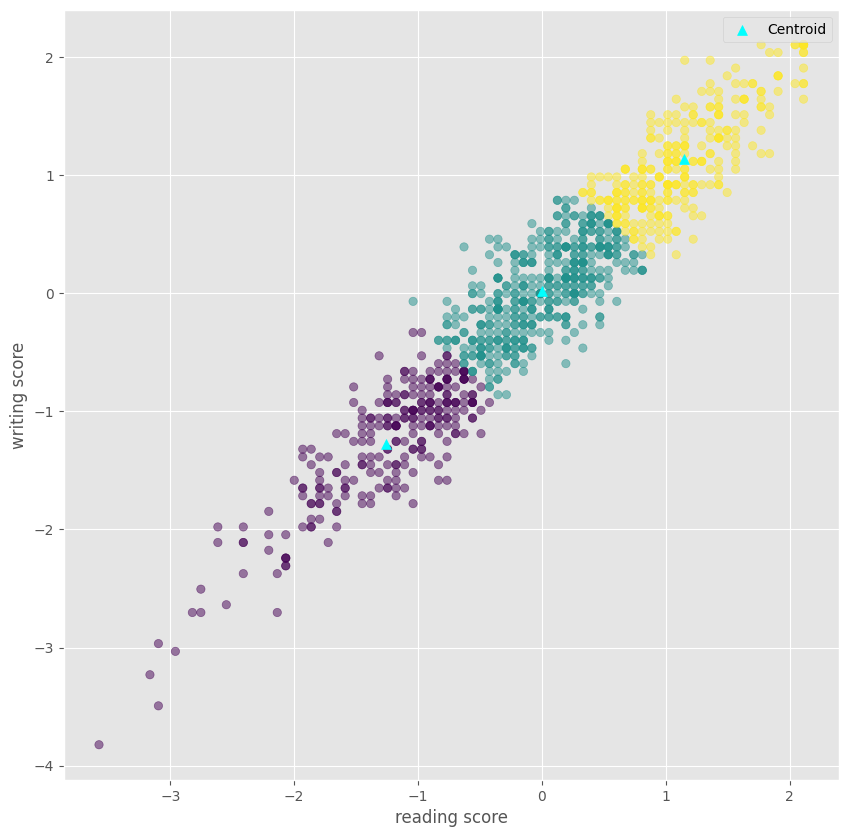

In [35]:
# Visualisasi Cluster
plt.figure(figsize = (10, 10))

# Titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha = 0.5, c = labels)

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker = "^", s=50, color = "cyan")

# Beri Label 
plt.xlabel("reading score")
plt.ylabel("writing score")

plt.legend()
plt.show()

#Perbedaan warna (terang/gelap) menentukan konsentrasi data tinggi terhadap data rendah

### DATA AKTUAL

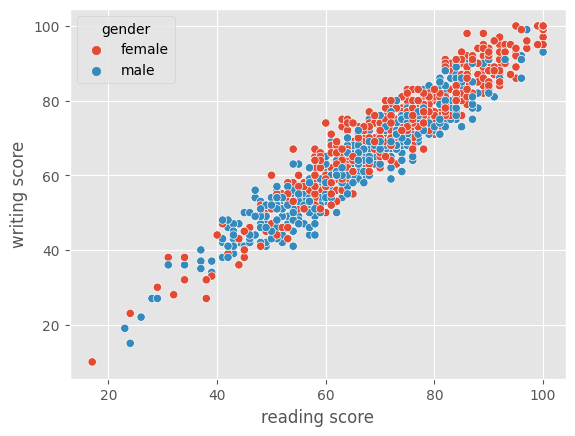

In [36]:
# LABEL AKTUAL
df_aktual = dataset[['reading score', 
                'writing score', 
                'gender']]
sns.scatterplot(
    x = 'reading score', 
    y = 'writing score',
    data = df_aktual,
    hue = 'gender')
plt.show()

### Menentukan Jumlah Cluster (Elbow Method)

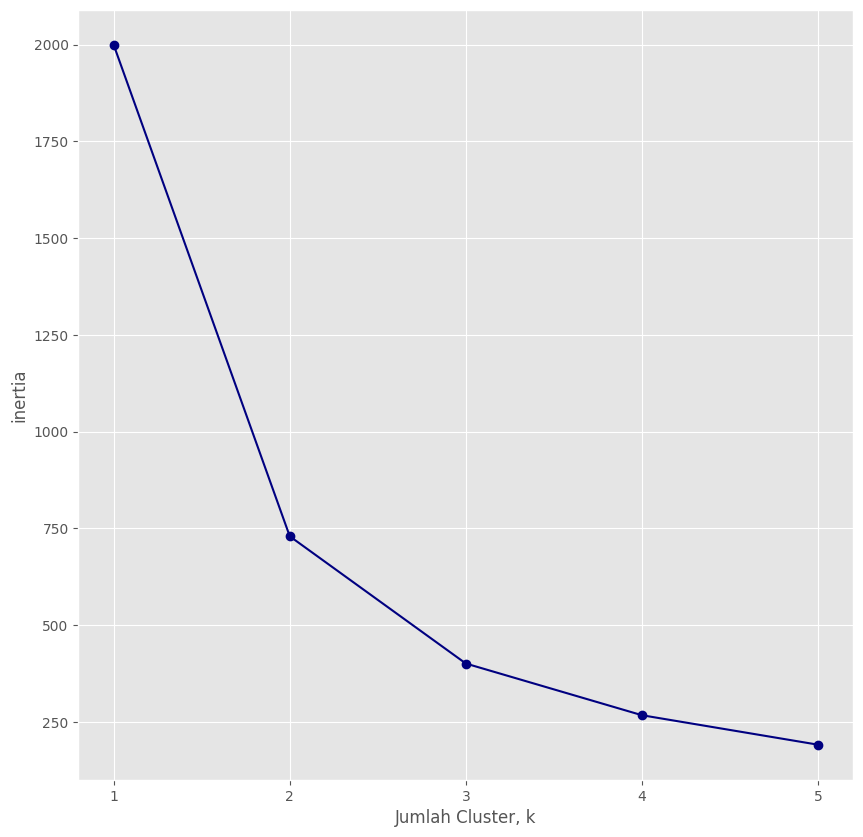

In [37]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o', color = "navy")
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Evaluasi Model K-Means

<AxesSubplot: title={'center': 'KMeans'}, xlabel='gender', ylabel='labels'>

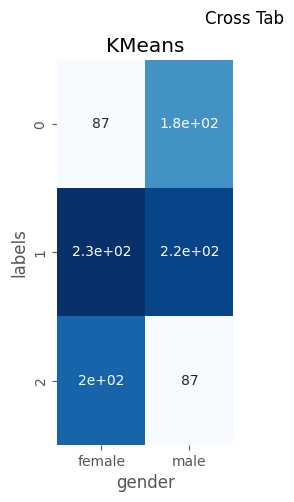

In [39]:
plt.figure(figsize = (5, 5))
plt.suptitle("Cross Tab")
plt.subplot(1, 2, 1)
plt.title("KMeans")
sns.heatmap(ct, annot=True, cbar=False, cmap="Blues")